<a href="https://colab.research.google.com/github/sharclark/Project1_Dojo/blob/main/Project_1_Part_4_Shar_Clark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 1
Shar Clark



## Loading Data



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/sales_predictions.csv')


## Data Cleaning
  1. How many rows and columns
    
  2. What are the datatypes of each variable?
    
  3. Are there duplicates? If so, drop any duplicates.

  4. Identify missing values.
  
  5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
  6. Confirm that there are no missing values after addressing them
  7. Find and fix any inconsistent categories and data  (example: fix cat, Cat, and cats so that they are consistent).
  8. For any numerical columns, obtain the summary stats of each (min, max, and mean)



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. 12 columns, 8523 rows

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [37]:
#are there any duplicates?
df.duplicated().sum()

0

In [38]:
# are there any missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [39]:
# how to address missing values
df[df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [40]:
df[('Outlet_Type')].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [41]:
df[('Outlet_Size')].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [42]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()


Outlet_Type        Outlet_Size
Grocery Store      Medium          555
                   Small           528
Supermarket Type1  Medium         2785
                   Small          1860
                   High            932
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [43]:
df_mode = df['Outlet_Size'].mode()

# This should work, but it doesn't. Instead fill with string of medium

In [44]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [45]:
df_mode

0    Medium
dtype: object

In [46]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
df_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value = df_weight, inplace=True)
# filling in missing values with average of item weight column

In [48]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [49]:
# 7. Find and fix any inconsistent categories and data (example: fix cat, Cat, and cats so that they are consistent).

df.nunique()

# fat content looks weird


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [50]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [51]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [52]:
df.replace(['low fat', 'reg', 'LF'], ['Low Fat', 'Regular', 'Low Fat'], inplace = True)

In [53]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [54]:
# For any numerical columns, obtain the summary stats of each (min, max, and mean)
df.describe().round(4)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0000,8523.0000,8523.0000,8523.0000,8523.0000
mean,12.8576,0.0661,140.9928,1997.8319,2181.2889
std,4.2261,0.0516,62.2751,8.3718,1706.4996
min,4.5550,0.0000,31.2900,1985.0000,33.2900
25%,9.3100,0.0270,93.8265,1987.0000,834.2474
50%,12.8576,0.0539,143.0128,1999.0000,1794.3310
75%,16.0000,0.0946,185.6437,2004.0000,3101.2964
max,21.3500,0.3284,266.8884,2009.0000,13086.9648




##Exploratory Visuals



In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


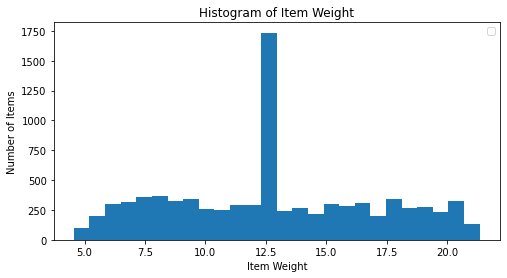

The most common weight of these food items is 12.5


In [26]:
plt.figure(figsize=(8,4))
plt.hist(df['Item_Weight'],bins='auto');


plt.xlabel("Item Weight")
plt.ylabel("Number of Items")
plt.title('Histogram of Item Weight');


plt.legend();
plt.show()
print('The most common weight of these food items is 12.5')

The Average for all item types is 12.5


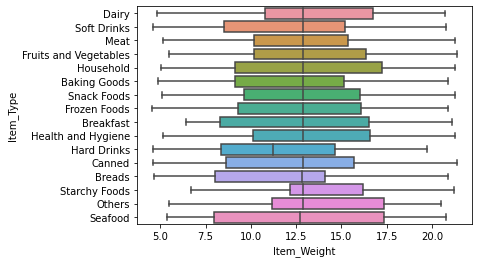

In [27]:
sns.boxplot(x = 'Item_Weight', y = 'Item_Type', data =df);

print('The Average for all item types is 12.5')

Item MRP and Item Outlet sales are somewhat closely related.
Establishment year does not seem to have any bearing on the rest of the data


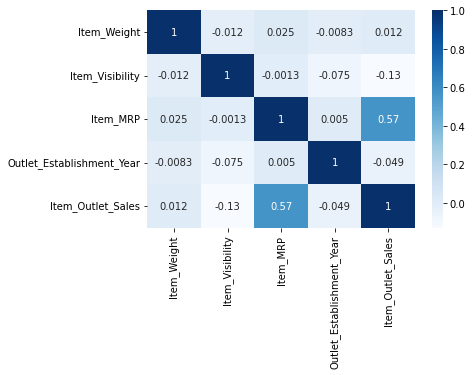

In [28]:
heatdata = df.corr()
sns.heatmap(heatdata, cmap = 'Blues', annot = True);

print('Item MRP and Item Outlet sales are somewhat closely related.\nEstablishment year does not seem to have any bearing on the rest of the data')

##Explanatory Visuals

In [125]:
import matplotlib.pyplot as plt

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [73]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


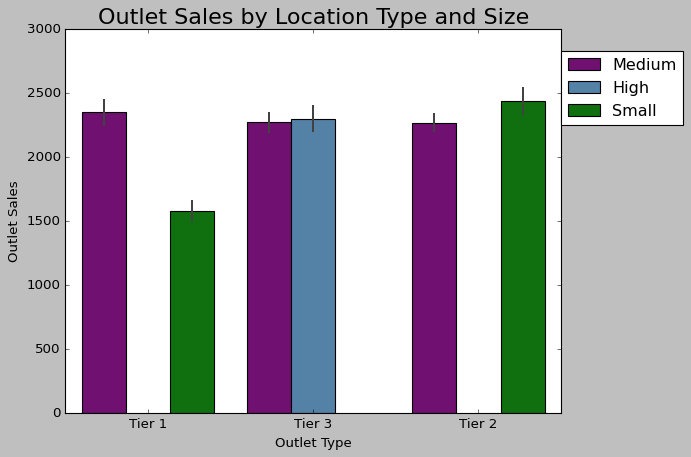

Medium Grocery Stores have the most consistent sales.
Let's look closer at Medium Outlet Sized stores.


In [102]:
# the things I want to graph here
# The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.


sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', hue = "Outlet_Size", palette=['purple', 'steelblue', 'green']);
plt.style.use('classic');
plt.title('Outlet Sales by Location Type and Size', fontsize=20);
plt.xlabel('Outlet Type', fontsize =12);
plt.ylabel('Outlet Sales', fontsize =12);
plt.legend(loc=(1,.75));
plt.show()
print("Medium Grocery Stores have the most consistent sales.\nLet's look closer at Medium Outlet Sized stores.")

In [161]:
#create new DFs for  grouped by Outlet Size to compare between groups. Want to take a closer look at what Mediums sizes doing in order to have consistent sales. 
Medium_Outlet_Size = df[df['Outlet_Size'] == 'Medium']
Small_Outlet_Size = df[df['Outlet_Size'] == 'Small']
High_Outlet_Size = df[df['Outlet_Size'] == 'High']
High_Outlet_Size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
14,FDF32,16.35,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
20,FDN22,18.85,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
27,DRJ59,11.65,Low Fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312


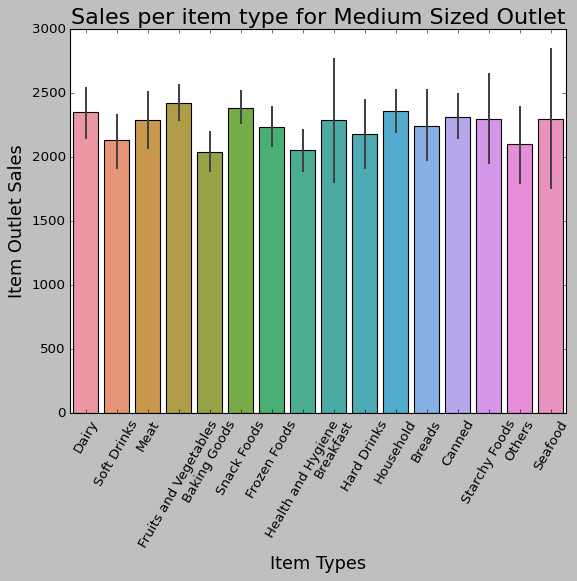

Medium sized outlets sell a lot of each type of item. 
There is no one item that they are making more sales with.


In [150]:
ax = sns.barplot(data = Medium_Outlet_Size , x = 'Item_Type', y = 'Item_Outlet_Sales');
plt.xticks(rotation = 60)
plt.style.use('classic');
plt.title('Sales per item type for Medium Sized Outlet', fontsize=20);
plt.xlabel('Item Types', fontsize =16);
plt.ylabel('Item Outlet Sales', fontsize =16);
plt.show()
print("Medium sized outlets sell a lot of each type of item. \nThere is no one item that they are making more sales with.")

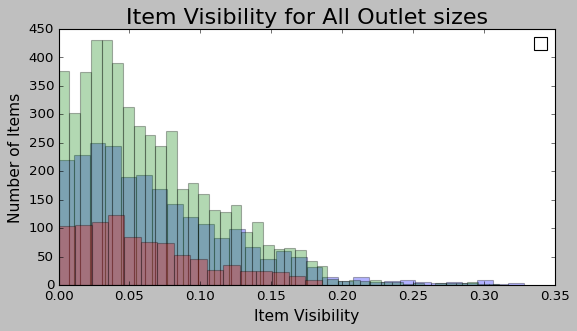

The highest proportion of item visibility for all Outlet sizes is Medium.
There is a direct correlation between Item visibility and sales.
The more visible items there are, the more sales the location is likely to get.


In [210]:
plt.figure(figsize=(8,4))
plt.hist(Small_Outlet_Size['Item_Visibility'],bins='auto', alpha = .3);
plt.hist(Medium_Outlet_Size['Item_Visibility'],bins='auto', alpha = .3);
plt.hist(High_Outlet_Size['Item_Visibility'],bins='auto', alpha = .3);

plt.xlabel("Item Visibility", size = 14);
plt.ylabel("Number of Items", size = 14);
plt.title('Item Visibility for All Outlet sizes', size = 20);
plt.legend(); # I cannot figure out how to put in the legend here but I know in this graph green is Medium. Put separate graphs below to confirm
plt.show();
print('The highest proportion of item visibility for all Outlet sizes is Medium.\nThere is a direct correlation between Item visibility and sales.\nThe more visible items there are, the more sales the location is likely to get.');

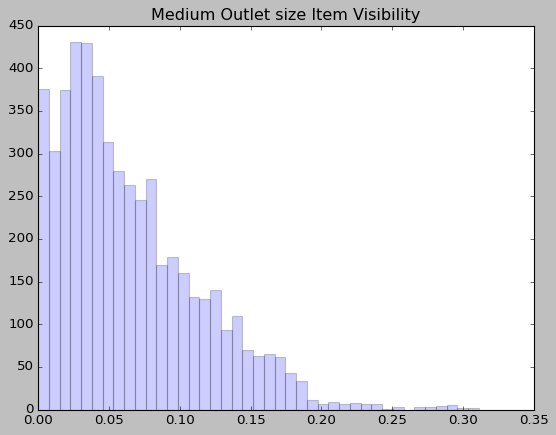

In [208]:
plt.hist(Medium_Outlet_Size['Item_Visibility'],bins='auto', alpha = .2);
plt.title("Medium Outlet size Item Visibility");

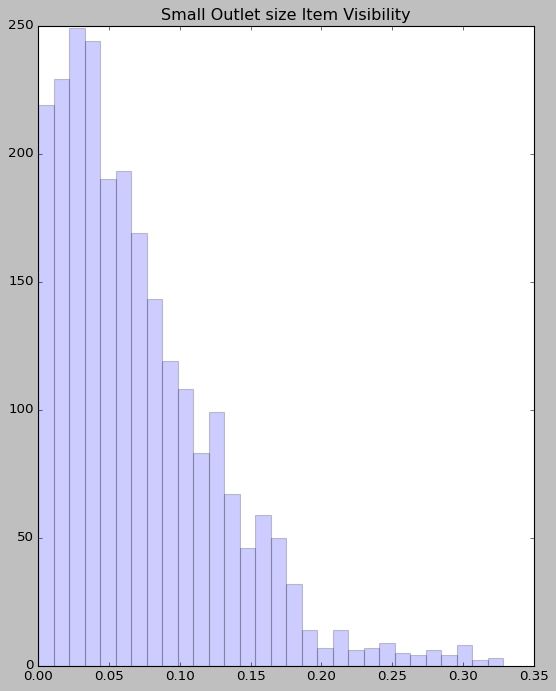

In [207]:
plt.figure(figsize=(8,10))
plt.hist(Small_Outlet_Size['Item_Visibility'],bins='auto', alpha = .2);
plt.title("Small Outlet size Item Visibility");

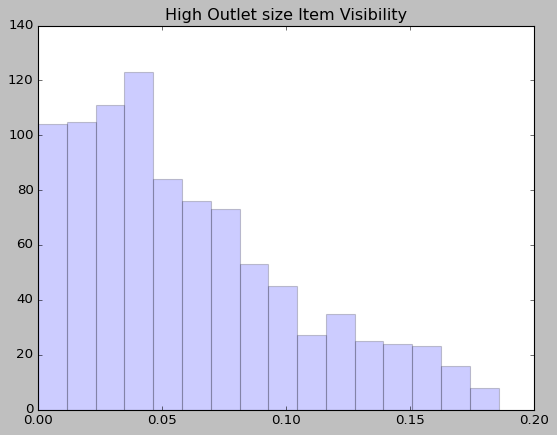

In [206]:
plt.hist(High_Outlet_Size['Item_Visibility'],bins='auto', alpha = .2);
plt.title("High Outlet size Item Visibility");